In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


In [5]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # set specific indices of results[i] to 1
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

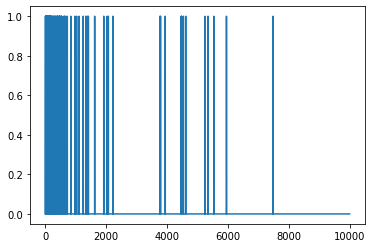

In [6]:
plt.plot(train_data[0])

In [7]:
baseline_model = keras.Sequential([
    # 'input_shap' is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

W0708 10:44:17.972244 139884962903872 deprecation.py:323] From /home/rose/envs/tensorflow-generic/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.4877 - accuracy: 0.8093 - binary_crossentropy: 0.4877 - val_loss: 0.3446 - val_accuracy: 0.8753 - val_binary_crossentropy: 0.3446
Epoch 2/20
25000/25000 - 3s - loss: 0.2563 - accuracy: 0.9096 - binary_crossentropy: 0.2563 - val_loss: 0.2863 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2863
Epoch 3/20
25000/25000 - 3s - loss: 0.1888 - accuracy: 0.9336 - binary_crossentropy: 0.1888 - val_loss: 0.2876 - val_accuracy: 0.8846 - val_binary_crossentropy: 0.2876
Epoch 4/20
25000/25000 - 3s - loss: 0.1537 - accuracy: 0.9469 - binary_crossentropy: 0.1537 - val_loss: 0.3088 - val_accuracy: 0.8791 - val_binary_crossentropy: 0.3088
Epoch 5/20
25000/25000 - 3s - loss: 0.1271 - accuracy: 0.9569 - binary_crossentropy: 0.1271 - val_loss: 0.3279 - val_accuracy: 0.8760 - val_binary_crossentropy: 0.3279
Epoch 6/20
25000/25000 - 3s - loss: 0.1062 - accuracy: 0.9670 - binary_crossentropy: 0.1062 - val_loss: 0.3557

In [10]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()
    


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6068 - accuracy: 0.7725 - binary_crossentropy: 0.6068 - val_loss: 0.5201 - val_accuracy: 0.8354 - val_binary_crossentropy: 0.5201
Epoch 2/20
25000/25000 - 3s - loss: 0.4303 - accuracy: 0.8704 - binary_crossentropy: 0.4303 - val_loss: 0.3958 - val_accuracy: 0.8664 - val_binary_crossentropy: 0.3958
Epoch 3/20
25000/25000 - 3s - loss: 0.3212 - accuracy: 0.8985 - binary_crossentropy: 0.3212 - val_loss: 0.3327 - val_accuracy: 0.8786 - val_binary_crossentropy: 0.3327
Epoch 4/20
25000/25000 - 3s - loss: 0.2599 - accuracy: 0.9134 - binary_crossentropy: 0.2599 - val_loss: 0.3022 - val_accuracy: 0.8847 - val_binary_crossentropy: 0.3022
Epoch 5/20
25000/25000 - 3s - loss: 0.2214 - accuracy: 0.9262 - binary_crossentropy: 0.2214 - val_loss: 0.2885 - val_accuracy: 0.8873 - val_binary_crossentropy: 0.2885
Epoch 6/20
25000/25000 - 3s - loss: 0.1947 - accuracy: 0.9350 - binary_crossentropy: 0.1947 - val_loss: 0.2830

In [13]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [14]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 9s - loss: 0.3461 - accuracy: 0.8523 - binary_crossentropy: 0.3461 - val_loss: 0.3094 - val_accuracy: 0.8720 - val_binary_crossentropy: 0.3094
Epoch 2/20
25000/25000 - 8s - loss: 0.1504 - accuracy: 0.9444 - binary_crossentropy: 0.1504 - val_loss: 0.3297 - val_accuracy: 0.8731 - val_binary_crossentropy: 0.3297
Epoch 3/20
25000/25000 - 9s - loss: 0.0560 - accuracy: 0.9830 - binary_crossentropy: 0.0560 - val_loss: 0.4503 - val_accuracy: 0.8672 - val_binary_crossentropy: 0.4503
Epoch 4/20
25000/25000 - 9s - loss: 0.0105 - accuracy: 0.9981 - binary_crossentropy: 0.0105 - val_loss: 0.5751 - val_accuracy: 0.8666 - val_binary_crossentropy: 0.5751
Epoch 5/20
25000/25000 - 9s - loss: 0.0012 - accuracy: 1.0000 - binary_crossentropy: 0.0012 - val_loss: 0.6690 - val_accuracy: 0.8693 - val_binary_crossentropy: 0.6690
Epoch 6/20
25000/25000 - 9s - loss: 2.8784e-04 - accuracy: 1.0000 - binary_crossentropy: 2.8784e-04 - val_loss

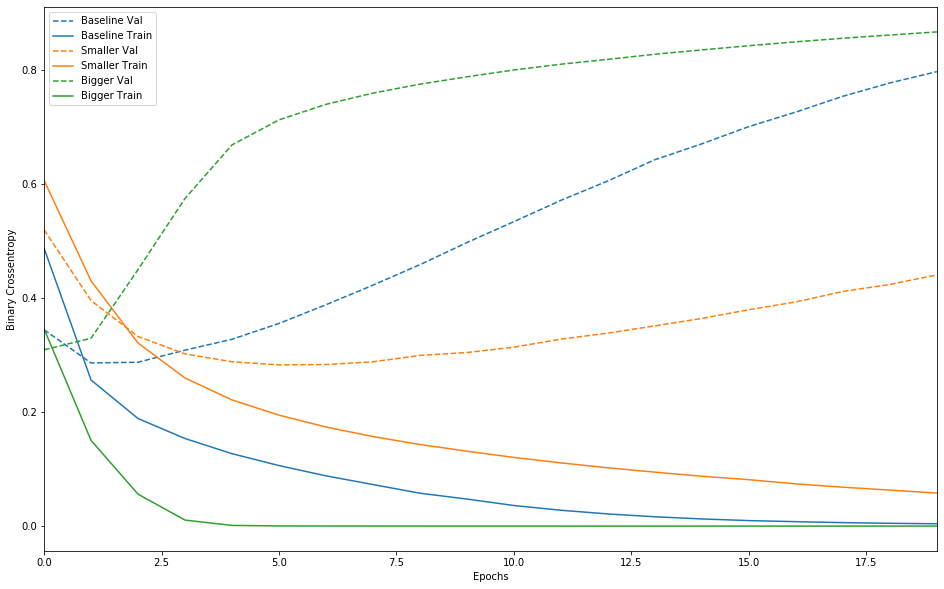

In [16]:
# Plot the training and validation loss
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
    
plot_history([('baseline', baseline_history),
            ('smaller', smaller_history),
            ('bigger', bigger_history)])

In [21]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5131 - accuracy: 0.8175 - binary_crossentropy: 0.4734 - val_loss: 0.3684 - val_accuracy: 0.8796 - val_binary_crossentropy: 0.3262
Epoch 2/20
25000/25000 - 2s - loss: 0.2948 - accuracy: 0.9085 - binary_crossentropy: 0.2483 - val_loss: 0.3342 - val_accuracy: 0.8873 - val_binary_crossentropy: 0.2847
Epoch 3/20
25000/25000 - 3s - loss: 0.2453 - accuracy: 0.9311 - binary_crossentropy: 0.1933 - val_loss: 0.3395 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2859
Epoch 4/20
25000/25000 - 2s - loss: 0.2245 - accuracy: 0.9411 - binary_crossentropy: 0.1691 - val_loss: 0.3595 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.3028
Epoch 5/20
25000/25000 - 3s - loss: 0.2089 - accuracy: 0.9492 - binary_crossentropy: 0.1512 - val_loss: 0.3702 - val_accuracy: 0.8770 - val_binary_crossentropy: 0.3116
Epoch 6/20
25000/25000 - 2s - loss: 0.1974 - accuracy: 0.9546 - binary_crossentropy: 0.1379 - val_loss: 0.3834

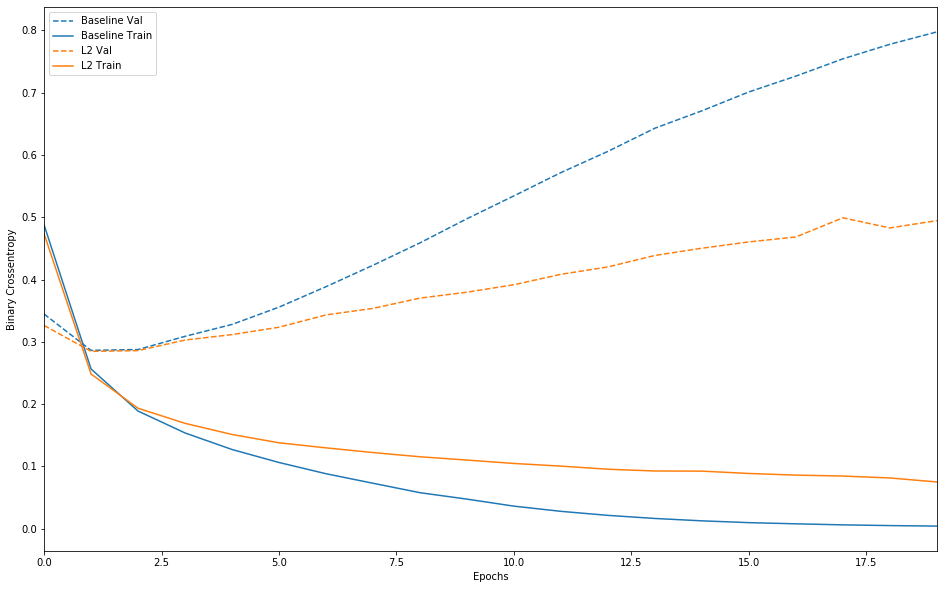

In [22]:
plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

In [23]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6423 - accuracy: 0.6282 - binary_crossentropy: 0.6423 - val_loss: 0.5352 - val_accuracy: 0.8486 - val_binary_crossentropy: 0.5352
Epoch 2/20
25000/25000 - 2s - loss: 0.4877 - accuracy: 0.8003 - binary_crossentropy: 0.4877 - val_loss: 0.3677 - val_accuracy: 0.8802 - val_binary_crossentropy: 0.3677
Epoch 3/20
25000/25000 - 3s - loss: 0.3700 - accuracy: 0.8642 - binary_crossentropy: 0.3700 - val_loss: 0.3059 - val_accuracy: 0.8871 - val_binary_crossentropy: 0.3059
Epoch 4/20
25000/25000 - 2s - loss: 0.3063 - accuracy: 0.8938 - binary_crossentropy: 0.3063 - val_loss: 0.2821 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2821
Epoch 5/20
25000/25000 - 3s - loss: 0.2611 - accuracy: 0.9123 - binary_crossentropy: 0.2611 - val_loss: 0.2777 - val_accuracy: 0.8869 - val_binary_crossentropy: 0.2777
Epoch 6/20
25000/25000 - 2s - loss: 0.2302 - accuracy: 0.9250 - binary_crossentropy: 0.2302 - val_loss: 0.2933

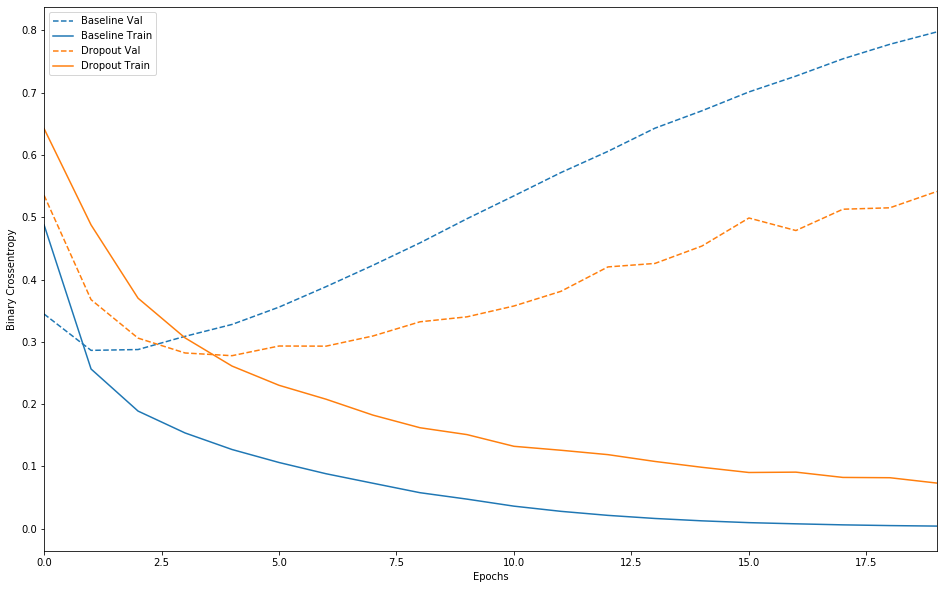

In [24]:
plot_history([('baseline', baseline_history),
             ('dropout', dpt_model_history)])